ValueError: not enough values to unpack (expected 3, got 2)

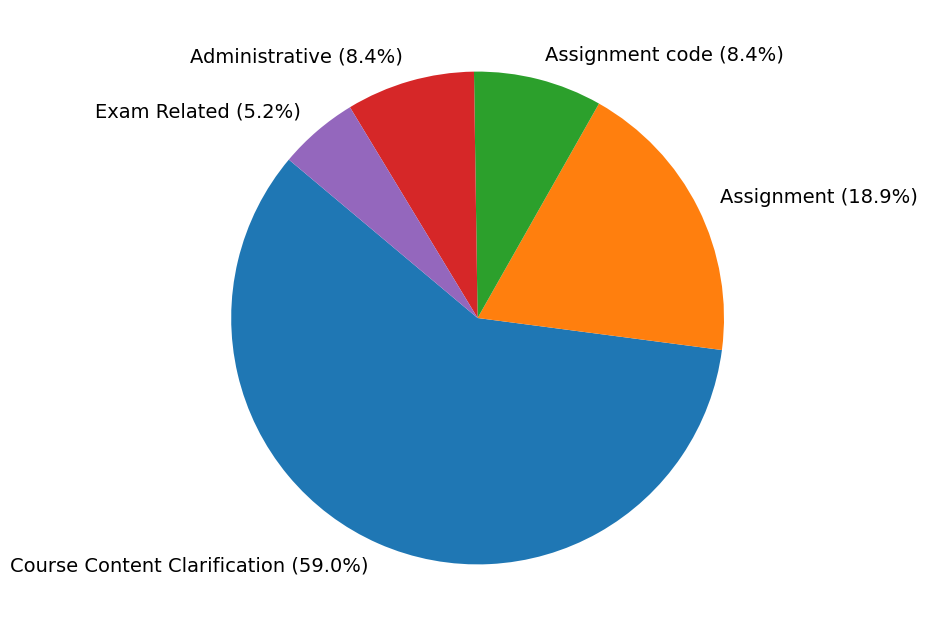

In [30]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

def load_test_data(base_directory_path):
    all_results = []
    for course_name in os.listdir(base_directory_path):
        course_path = os.path.join(base_directory_path, course_name)
        if os.path.isdir(course_path):
            data_file_path = os.path.join(course_path, 'data.json')
            if os.path.isfile(data_file_path):
                with open(data_file_path, 'r') as f:
                    test_data = json.load(f)
                for section, test_cases in test_data.items():
                    for test_case in test_cases:
                        category = test_case.get('category', 'Unknown')
                        if category == 'Coding_Help':
                            category = 'Assignment code'
                        category = category.replace('_', ' ')
                        all_results.append({
                            'section': section,
                            'category': category
                        })
            else:
                print(f"Data file for {course_name} not found at {data_file_path}")
    return all_results

def visualize_combined_distribution(results, output_file):
    categories = [result['category'] for result in results]
    category_counter = Counter(categories)
    total = sum(category_counter.values())

    fig, ax = plt.subplots(figsize=(12, 8))

    def format_label(label, count):
        percentage = (count / total) * 100
        return f"{label} ({percentage:.1f}%)"

    labels = [format_label(label, count) for label, count in category_counter.items()]

    wedges, texts, autotexts = ax.pie(
        category_counter.values(),
        labels=labels,
        startangle=140,
        textprops={'fontsize': 14, 'color': 'black'}
    )

    for text in texts:
        text.set_fontsize(20)
        text.set_color('black')

    ax.set_title('Categories', fontsize=16)
    plt.tight_layout()
    plt.show()
    fig.savefig(output_file)
if __name__ == "__main__":
    base_directory_path = './datasets'
    test_results = load_test_data(base_directory_path)
    
    if test_results:
        visualize_combined_distribution(test_results, 'categoryDistribution.png')
    else:
        print("No test results found.")
